First, we import the necessary libraries

In [1]:
import sys
import os
src_path = os.path.abspath(os.path.join(os.getcwd(), '../src'))
sys.path.append(src_path)
from messy import *

We generate samples of a bi-modal distribution as the target density that we would like to infer it from its samples.

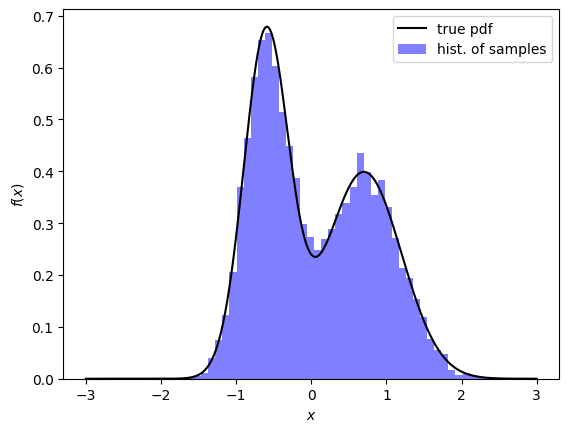

In [2]:
def Gaussian(x,mu,sig):
  return 1.0/(sig*np.sqrt(2.0*np.pi)) * np.exp(-0.5*(x-mu)**2/sig**2)

def bi_mod(x,mu1,mu2,sig1,sig2):
  return 0.5*( Gaussian(x,mu1,sig1) + Gaussian(x,mu2,sig2) )

n_samples = 10000
mu1 = -0.6; mu2=0.7; sig1=0.3; sig2 = 0.5
X = np.concatenate([np.random.normal(mu1,sig1,int(n_samples/2)), np.random.normal(mu2,sig2,n_samples-int(n_samples/2))])
#X = X[:,None]
#print(X.shape)
true_pdf = lambda x: bi_mod(x,mu1,mu2,sig1,sig2)

xx = np.linspace(-3, 3, 1000) # for plotting
fig, ax = plt.subplots()
ax.plot(xx, true_pdf(xx), color="black", label = "true pdf")
_ = ax.hist(X, color="blue", label = "hist. of samples", density=True, bins=50, alpha=0.5)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x)$")
ax.legend()
plt.show()

In [5]:
highest_order = 4
x = sp.symbols('x', real=True)
poly_order = highest_order
pow = [sp.lambdify(x, x**i, "numpy") for i in range(1, poly_order+1)]
binary_operators = [sp.Mul]
unary_functions = [cos_, sin_] + pow
tree_depth = 2
n_rounds = 5
nb_l, nb_u = 2, 4 # number of symbolic bases, lower and upper bounds
nm_xe = highest_order
dim = 1
messy = MESSY(dim, highest_order=highest_order, nb_l=nb_l, nb_u=nb_u, poly_order=poly_order, tree_depth=tree_depth, binary_operators=binary_operators, unary_functions=unary_functions)

In [10]:
dic, best_iter = messy.get_pdf(X, N_iters=n_rounds, Nm_xe=nm_xe,
                         N_levels=1, threshold_sample=1e-1,
                         left=False, right=False, verbose = True)

Round: 0
Level: 0


Round: 1
Level: 0


Round: 2
Level: 0


Round: 3
Level: 0


Round: 4
Level: 0


best_iter: 3


In [11]:
dic[0][1]

0.379235046733136*exp(-0.571249619579121*x**4 + 0.884331374279051*x**3 + 0.0904125051007254*x**2 - 1.00932683349604*x)*exp(-0.193083916644291*x**4 + 0.00152825134302065*x**3 + 0.441525796630762*x**2 + 0.155413709898472*x)

In [12]:
dic[best_iter][1]

0.538041195536356*exp(-0.280855232509746*x**4 - 1.97452690752878e-16*sin(5*x/2)*sin(3*x) - 0.460299760310946*cos(5*x/2)*cos(3*x) - 0.218863701497148*cos(3*x))*exp(-0.199791948690769*x**4 + 0.673276612750157*x**3 - 0.0684379103308601*x**2 - 0.607337115637841*x)

Found MESSY-P:
0.379235046733136*exp(-0.571249619579121*x**4 + 0.884331374279051*x**3 + 0.0904125051007254*x**2 - 1.00932683349604*x)*exp(-0.193083916644291*x**4 + 0.00152825134302065*x**3 + 0.441525796630762*x**2 + 0.155413709898472*x)



Found MESSY-S:
0.538041195536356*exp(-0.280855232509746*x**4 - 1.97452690752878e-16*sin(5*x/2)*sin(3*x) - 0.460299760310946*cos(5*x/2)*cos(3*x) - 0.218863701497148*cos(3*x))*exp(-0.199791948690769*x**4 + 0.673276612750157*x**3 - 0.0684379103308601*x**2 - 0.607337115637841*x)





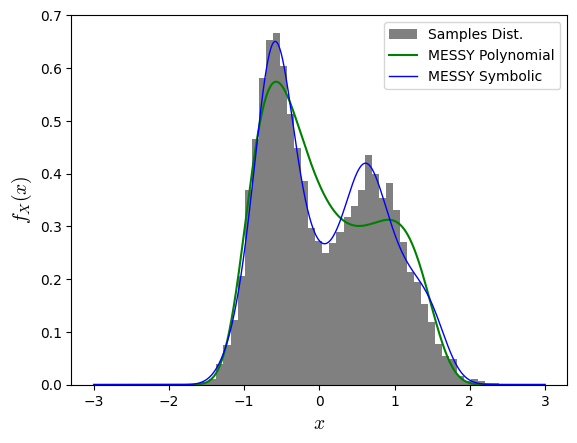

In [13]:
xx = np.linspace(-3, 3, 1000)

print("Found MESSY-P:")
print( dic[0][1] )
print("\n\n")

print("Found MESSY-S:")
print( dic[best_iter][1] )
print("\n\n")

fig, ax = plt.subplots()
plt.rcParams['mathtext.fontset'] = 'cm'
plt.hist(X, bins=50, density=True, color="grey", label = "Samples Dist.")
plt.plot(xx, dic[0][0](xx), linewidth = 1.5, label = "MESSY Polynomial", color = 'green')
plt.plot(xx, dic[best_iter][0](xx), linewidth = 1, label = "MESSY Symbolic", color = 'blue')
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$f_X(x)$", fontsize=14)
plt.legend()

plt.show()